## Clean data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("RawData.csv")
df

,ID,List ID,Posted Time,Status,Transaction Type,Seller Name,Seller ID,Region (Code),Region Name,Category,...,Width (Text),Ad ID,State,Floors,Rooms,Toilets,Furnishing Sell,District,District Name,House Type
0,154269561,113584228,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Ngang 4 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
1,164081534,122031985,07/02/2025,accepted,s,Minh trí,12588075.0,3,Đà Nẵng,1040,...,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
2,156854814,115807159,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Ngang 10 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
3,163242245,121308677,31/01/2025,accepted,s,Khang anh,24585559.0,3,Đà Nẵng,1040,...,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận cẩm lệ,Quận Cẩm Lệ,NaN
4,162985943,121088552,01/02/2025,accepted,s,Khang anh,4483578.0,3,Đà Nẵng,1040,...,Ngang 5 m,0,0,0.0,0.0,0.0,0.0,quận liên chiểu,Quận Liên Chiểu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36965,0,124939066,16/05/2025,0,s,NaN,NaN,0,0,1020,...,NaN,167454068,accepted,NaN,11.0,NaN,NaN,NaN,Quận Ngũ Hành Sơn,NaN
36966,0,124889629,19/05/2025,0,s,NaN,NaN,0,0,1020,...,NaN,167396577,accepted,3.0,6.0,4.0,NaN,NaN,Quận Ngũ Hành Sơn,NaN
36967,0,125015930,16/05/2025,0,s,NaN,NaN,0,0,1020,...,NaN,167542275,accepted,8.0,11.0,7.0,1.0,NaN,Quận Sơn Trà,NaN
36968,0,124986420,21/05/2025,0,s,NaN,NaN,0,0,1020,...,NaN,167508914,accepted,1.0,11.0,7.0,3.0,NaN,Quận Hải Châu,NaN


In [3]:
df = df[
    [
        "Posted Time","Longitude","Latitude", "Category Name",
        "Area", "Width", "Length", "Land Type",
        "Legal Status", "House Direction", "Property Features",
        "Floors", "Rooms", "Toilets", "Furnishing Sell", "Price per m²"
    ]
]

df_initial = df.copy()
df

,Posted Time,Longitude,Latitude,Category Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m²
0,31/01/2025,108.169500,16.065700,Đất,100.0,4.0,25.0,4,6.0,5.0,2; 4,0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,Đất,102.0,5.0,23.0,4,6.0,8.0,3,0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,Đất,150.0,10.0,15.0,4,6.0,6.0,2; 3; 4,0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,Đất,100.0,5.0,20.0,4,5.0,6.0,4; 2; 3,0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,Đất,100.0,5.0,20.0,4,5.0,4.0,4; 2,0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36965,16/05/2025,108.242260,16.037655,Nhà ở,100.0,NaN,NaN,0,1.0,NaN,0,NaN,11.0,NaN,NaN,250.000000
36966,19/05/2025,108.252910,16.032557,Nhà ở,187.5,7.5,25.0,0,1.0,1.0,0,3.0,6.0,4.0,NaN,165.333330
36967,16/05/2025,108.229300,16.067245,Nhà ở,125.0,5.0,25.0,0,1.0,2.0,0,8.0,11.0,7.0,1.0,408.000000
36968,21/05/2025,108.215280,16.077461,Nhà ở,291.0,10.5,29.0,0,1.0,6.0,0,1.0,11.0,7.0,3.0,209.622000


In [4]:
df.rename(columns={"Price per m²": "Price per m2"}, inplace=True)

### Handling missing data

#### Lost data statistics

In [5]:
print(df.isnull().sum())

Posted Time              0
Longitude                0
Latitude                 0
Category Name            0
Area                     1
Width                 8343
Length               13558
Land Type                0
Legal Status             1
House Direction      16162
Property Features     5652
Floors                5888
Rooms                    1
Toilets               4224
Furnishing Sell       8302
Price per m2             1
dtype: int64


In [6]:
numeric_cols = df.select_dtypes(include='number').columns

check_only_less_than_zero = ['Floors', 'Rooms', 'Toilets', 'Furnishing Sell', 'Land Type']

for col in numeric_cols:
    if col in check_only_less_than_zero:
        invalid_mask = df[col] < 0
        condition = "< 0"
    else:
        invalid_mask = df[col] <= 0
        condition = "<= 0"
    
    invalid_count = invalid_mask.sum()
    
    if invalid_count > 0:
        print(f"Column '{col}' has {invalid_count} invalid value(s) (condition: {condition})")
    else:
        print(f"Column '{col}' has no invalid values (condition: {condition})")


Column 'Longitude' has 16 invalid value(s) (condition: <= 0)
Column 'Latitude' has 16 invalid value(s) (condition: <= 0)
Column 'Area' has no invalid values (condition: <= 0)
Column 'Width' has no invalid values (condition: <= 0)
Column 'Length' has no invalid values (condition: <= 0)
Column 'Land Type' has no invalid values (condition: < 0)
Column 'Legal Status' has no invalid values (condition: <= 0)
Column 'House Direction' has no invalid values (condition: <= 0)
Column 'Floors' has no invalid values (condition: < 0)
Column 'Rooms' has no invalid values (condition: < 0)
Column 'Toilets' has no invalid values (condition: < 0)
Column 'Furnishing Sell' has no invalid values (condition: < 0)
Column 'Price per m2' has no invalid values (condition: <= 0)


In [7]:
# Đếm số giá trị trống theo từng hàng
missing_per_row = df.isnull().sum(axis=1)

# Đếm số lượng hàng tương ứng với mỗi số lượng giá trị trống
missing_summary = missing_per_row.value_counts().sort_index()

# Hiển thị kết quả
print("Number of rows by count of missing values:")
for missing_count, row_count in missing_summary.items():
    print(f"{row_count} row(s) with {missing_count} missing value(s)")

Number of rows by count of missing values:
12902 row(s) with 0 missing value(s)
8614 row(s) with 1 missing value(s)
4930 row(s) with 2 missing value(s)
4028 row(s) with 3 missing value(s)
3163 row(s) with 4 missing value(s)
1079 row(s) with 5 missing value(s)
2253 row(s) with 6 missing value(s)
1 row(s) with 10 missing value(s)


In [8]:
df_cleaned = df[df.isnull().sum(axis=1) < 3]

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (36970, 16)
Cleaned shape: (26446, 16)


In [9]:
df_cleaned.dropna(subset=["Area"], inplace=True)
df_cleaned.dropna(subset=["Price per m2"], inplace=True)
df_cleaned.dropna(subset=["Rooms"], inplace=True)

In [10]:
print(df_cleaned.isnull().sum())
df=df_cleaned.copy()

Posted Time             0
Longitude               0
Latitude                0
Category Name           0
Area                    0
Width                 822
Length               4141
Land Type               0
Legal Status            0
House Direction      6766
Property Features    3187
Floors                934
Rooms                   0
Toilets               349
Furnishing Sell      2275
Price per m2            0
dtype: int64


#### For the Width and Length variables

*After the statistics we know that the area data is complete, then check if there is width but no length or vice versa, then use the area calculation formula. If both features are empty, the default is 5 for width and 5 for length*

In [11]:
# If Length is empty but Width exists, then calculate Length
df.loc[df["Length"].isna() & df["Width"].notna(), "Length"] = (
df["Area"] / df["Width"]
)

# If Width is empty but Length exists, then calculate Width
df.loc[df["Width"].isna() & df["Length"].notna(), "Width"] = (
df["Area"] / df["Length"]
)

# If both Width and Length are empty, set Width = 5 and calculate Length
missing_indexes = df[df["Width"].isna() & df["Length"].isna()].index
df.loc[missing_indexes, "Length"] = df.loc[missing_indexes, "Area"] / 5
df.loc[missing_indexes, "Width"] = 5

In [12]:
before_count = (df_initial["Width"].dropna().clip(0, 100) == 5).sum()
after_count = (df["Width"].dropna().clip(0, 100) == 5).sum()

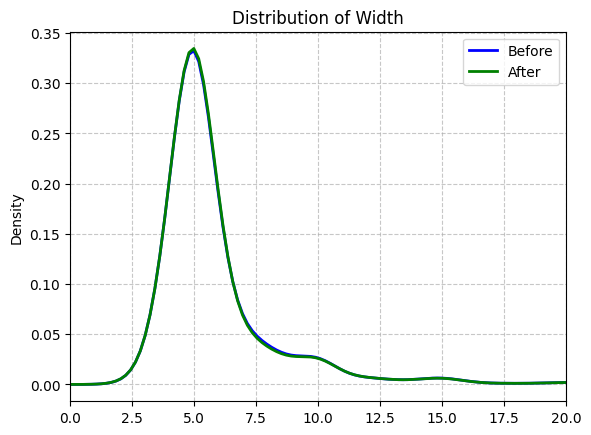

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_initial["Width"].dropna().clip(0, 100).plot(
    kind='kde', ax=ax, color='blue', label="Before", linewidth=2
)
df["Width"].dropna().clip(0, 100).plot(
    kind='kde', ax=ax, color='green', label="After", linewidth=2
)
ax.set_xlim(0, 20)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(loc='best')
ax.set_title("Distribution of Width")
plt.show()

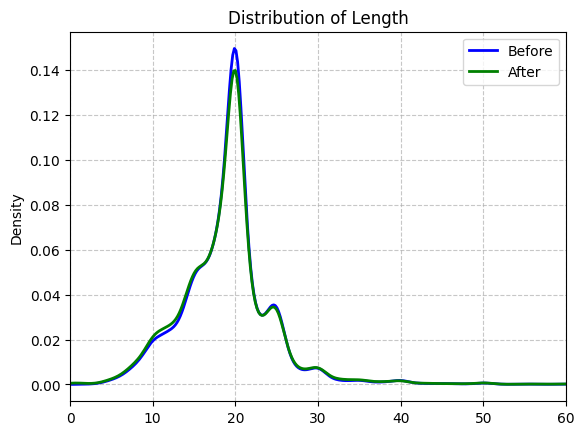

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_initial["Length"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='blue', label="Before", linewidth=2)
df["Length"].dropna().clip(0, 100).plot(kind='kde', ax=ax, color='green', label="After", linewidth=2)
ax.set_xlim(0, 60)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(loc='best')
ax.set_title("Distribution of Length")
plt.show()

In [15]:
def replace_invalid_house_direction(direction):
    if pd.isna(direction):
        return random.randint(1, 8)
    return direction  

df["House Direction"] = df["House Direction"].apply(replace_invalid_house_direction)

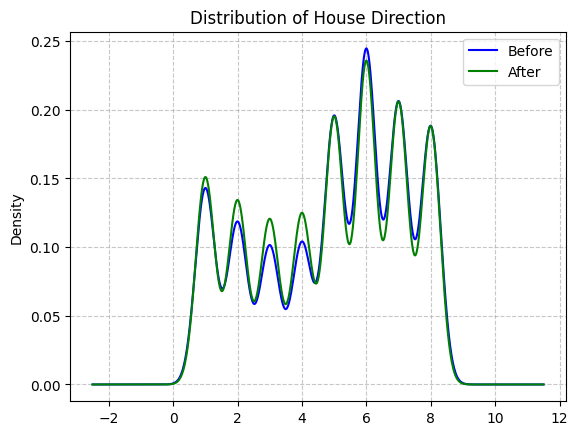

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["House Direction"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["House Direction"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of House Direction")
plt.show()


In [17]:
df.loc[(df["Land Type"] == 1) & (df["Property Features"].isna()), "Property Features"] = "3"
df.loc[(df["Land Type"] != 1) & (df["Property Features"].isna()), "Property Features"] = "4"
df

,Posted Time,Longitude,Latitude,Category Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,108.169500,16.065700,Đất,100.0,4.0,25.0,4,6.0,5.0,2; 4,0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,Đất,102.0,5.0,23.0,4,6.0,8.0,3,0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,Đất,150.0,10.0,15.0,4,6.0,6.0,2; 3; 4,0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,Đất,100.0,5.0,20.0,4,5.0,6.0,4; 2; 3,0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,Đất,100.0,5.0,20.0,4,5.0,4.0,4; 2,0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36963,14/05/2025,108.244910,16.024020,Nhà ở,289.0,15.0,19.0,0,1.0,6.0,0,3.0,4.0,NaN,2.0,74.394460
36964,14/05/2025,108.240776,16.029799,Nhà ở,200.0,10.0,20.0,0,1.0,7.0,0,3.0,5.0,6.0,1.0,110.000000
36966,19/05/2025,108.252910,16.032557,Nhà ở,187.5,7.5,25.0,0,1.0,1.0,0,3.0,6.0,4.0,NaN,165.333330
36967,16/05/2025,108.229300,16.067245,Nhà ở,125.0,5.0,25.0,0,1.0,2.0,0,8.0,11.0,7.0,1.0,408.000000


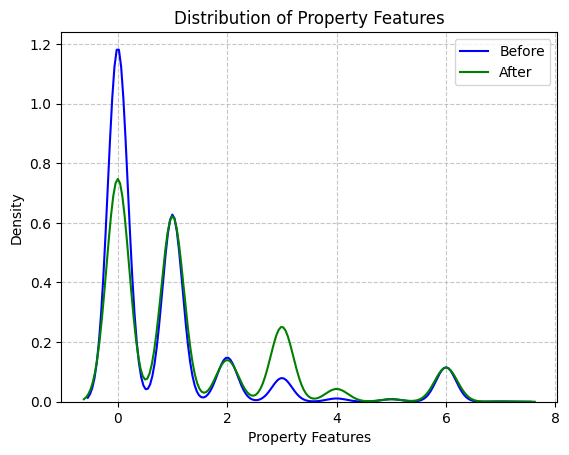

In [18]:
# Convert the 'Property Features' column into a list
df_initial["Property Features"] = df_initial["Property Features"].astype(str).str.split(";")
df["Property Features"] = df["Property Features"].astype(str).str.split(";")

# Expand each value in the array into separate rows
df_initial_exploded = df_initial.explode("Property Features")
df_exploded = df.explode("Property Features")

# Convert values to numeric type
df_initial_exploded["Property Features"] = pd.to_numeric(df_initial_exploded["Property Features"], errors="coerce")
df_exploded["Property Features"] = pd.to_numeric(df_exploded["Property Features"], errors="coerce")

# Plot KDE
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(df_initial_exploded["Property Features"].dropna(), ax=ax, color='blue', label="Before")
sns.kdeplot(df_exploded["Property Features"].dropna(), ax=ax, color='green', label="After")
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend()
ax.set_title("Distribution of Property Features")
plt.show()


In [19]:
feature_mapping = {
    0: "No thing",
    1: "Frontage",
    2: "Back Expansion",
    3: "1 Part Residential",
    4: "No Residential",
    5: "Car Alley",
    6: "No Residential",
    7: "All Residential"
}

df["Property Features"] = df["Property Features"].apply(lambda x: [feature_mapping[int(num)] for num in x])
df.head()

,Posted Time,Longitude,Latitude,Category Name,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,108.169500,16.065700,Đất,100.0,4.0,25.0,4,6.0,5.0,"[Back Expansion, No Residential]",0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,Đất,102.0,5.0,23.0,4,6.0,8.0,[1 Part Residential],0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,Đất,150.0,10.0,15.0,4,6.0,6.0,"[Back Expansion, 1 Part Residential, No Reside...",0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,Đất,100.0,5.0,20.0,4,5.0,6.0,"[No Residential, Back Expansion, 1 Part Reside...",0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,Đất,100.0,5.0,20.0,4,5.0,4.0,"[No Residential, Back Expansion]",0.0,0.0,0.0,0.0,2.500000


In [20]:
df['Floors'] = df.apply(lambda row: np.floor((row['Rooms'] - 1) / 2) + 1 if pd.isnull(row['Floors']) else row['Floors'], axis=1)

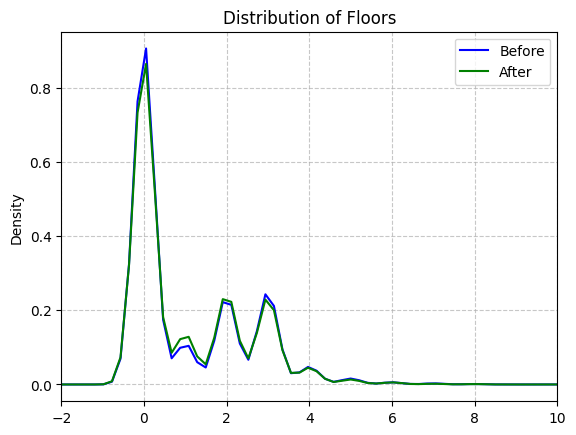

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_initial["Floors"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Floors"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

ax.set_xlim(-2, 10) 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Floors")
plt.show()

In [22]:
df['Toilets'] = df.apply(lambda row: row['Floors'] if pd.isna(row['Toilets']) else row['Toilets'], axis=1)

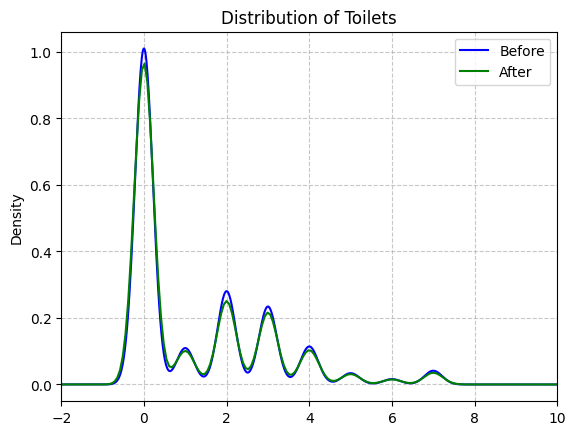

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Toilets"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Toilets"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

ax.set_xlim(-2, 10)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Toilets")

plt.show()

In [24]:
df["Furnishing Sell"] = df["Furnishing Sell"].apply(lambda x: np.random.randint(0, 3) if pd.isna(x) else x)

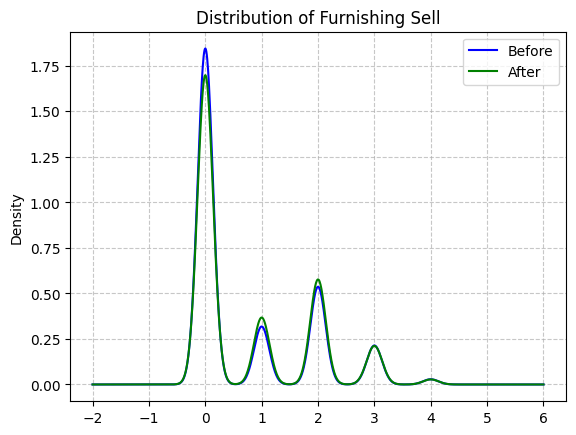

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_initial["Furnishing Sell"].dropna().plot(kind='kde', ax=ax, color='blue', label="Before")
df["Furnishing Sell"].dropna().plot(kind='kde', ax=ax, color='green', label="After")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.grid(True, linestyle="--", alpha=0.7)
ax.set_title("Distribution of Furnishing Sell")
plt.show()

In [26]:
print(df.isnull().sum())

Posted Time          0
Longitude            0
Latitude             0
Category Name        0
Area                 0
Width                0
Length               0
Land Type            0
Legal Status         0
House Direction      0
Property Features    0
Floors               0
Rooms                0
Toilets              0
Furnishing Sell      0
Price per m2         0
dtype: int64


In [27]:
df_land = df[df["Category Name"] == "Đất"]
df_land = df_land.drop(columns=["Category Name"]) 
df_land

,Posted Time,Longitude,Latitude,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,108.169500,16.065700,100.0,4.0,25.000000,4,6.0,5.0,"[Back Expansion, No Residential]",0.0,0.0,0.0,0.0,1.500000
1,07/02/2025,108.158270,16.053888,102.0,5.0,23.000000,4,6.0,8.0,[1 Part Residential],0.0,0.0,0.0,0.0,1.617647
2,31/01/2025,108.150700,16.058900,150.0,10.0,15.000000,4,6.0,6.0,"[Back Expansion, 1 Part Residential, No Reside...",0.0,0.0,0.0,0.0,1.666667
3,31/01/2025,108.172516,16.028736,100.0,5.0,20.000000,4,5.0,6.0,"[No Residential, Back Expansion, 1 Part Reside...",0.0,0.0,0.0,0.0,2.500000
4,01/02/2025,108.136940,16.077059,100.0,5.0,20.000000,4,5.0,4.0,"[No Residential, Back Expansion]",0.0,0.0,0.0,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,22/05/2025,108.212450,16.075340,198.0,8.0,24.000000,1,1.0,6.0,"[Frontage, 1 Part Residential]",0.0,0.0,0.0,0.0,148.989900
34959,15/05/2025,108.246100,16.031725,443.0,21.0,21.095238,2,1.0,6.0,[Frontage],0.0,0.0,0.0,0.0,72.234764
34960,15/05/2025,108.247000,16.041910,705.0,15.0,47.000000,1,1.0,8.0,[Frontage],0.0,0.0,0.0,0.0,48.226950
34961,17/05/2025,108.245834,16.055560,180.0,9.0,20.000000,1,1.0,7.0,[Frontage],0.0,0.0,0.0,0.0,200.000000


### Exceptional data processing (outliers)

In [28]:
df = df[df["Price per m2"] >= 2].copy()

In [29]:
df_noOutliers = df.copy()

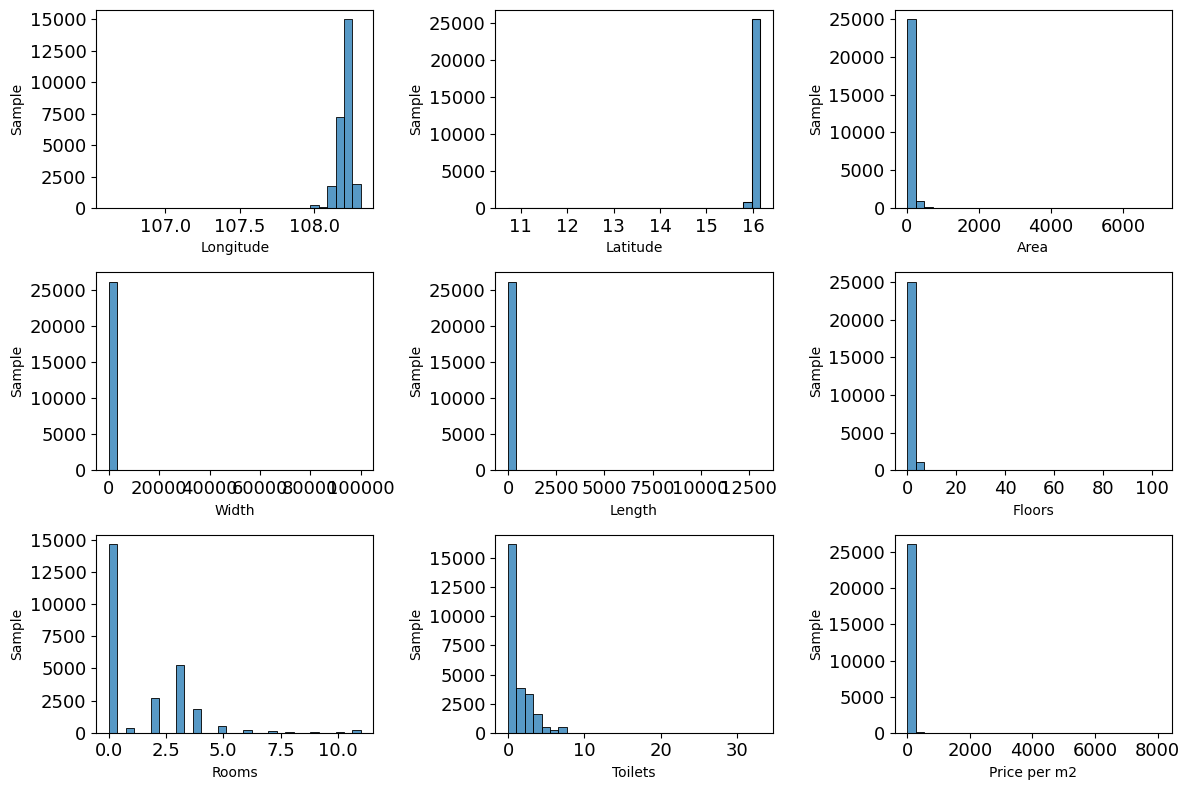

In [30]:
numerical_columns = ["Longitude","Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, bins=30)
    plt.ylabel('Sample')
    plt.xlabel(col)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()


In [31]:
cols = ["Longitude","Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 3 * iqr
    lower_bound = q1 - 3 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

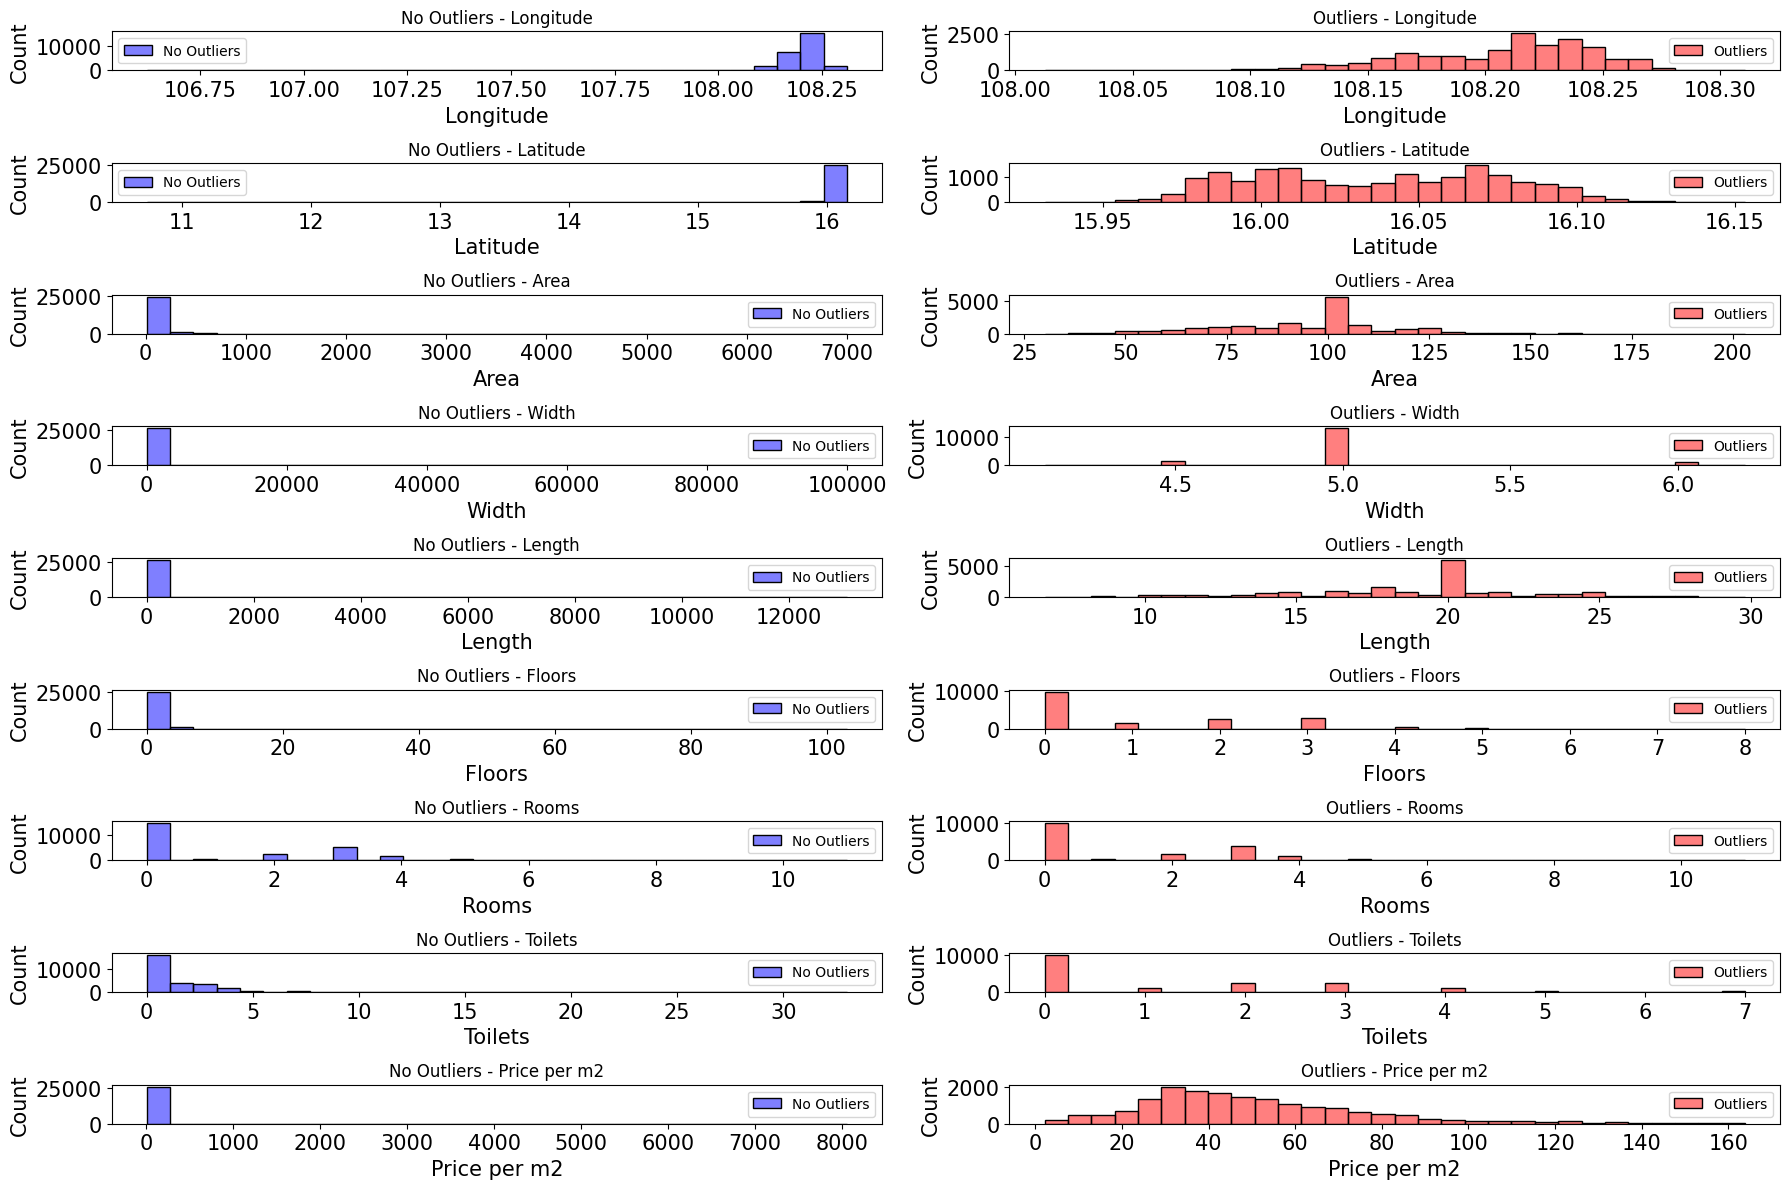

In [32]:
cols = ["Longitude","Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(9, 2, 2*i-1) 
    sns.histplot(data=df_noOutliers, x=col, bins=30, color='blue', alpha=0.5, label='No Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)   
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('No Outliers - ' + col)
    plt.legend()

    plt.subplot(9, 2, 2*i) 
    sns.histplot(data=df, x=col, bins=30, color='red', alpha=0.5, label='Outliers')
    plt.ylabel('Count', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15) 
    plt.title('Outliers - ' + col)
    plt.legend()

plt.tight_layout()
plt.show()

In [33]:
df.to_csv('CleanData.csv', index=False)

## Conclusion